In [1]:
import os
VERSION = 9
if VERSION is not None:
    os.environ["CC"] = f"/usr/bin/gcc-{VERSION}"
    os.environ["CXX"] = f"/usr/bin/g++-{VERSION}"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
from pathlib import Path
import sys
sys.path.append(str(Path(os.path.abspath('')).parent))
print(str(Path(os.path.abspath('')).parent))

from utils.compare_quad import test_tetrahedra_rendering
import torch
import matplotlib.pyplot as plt
import numpy as np
from utils import topo_utils
from tests.multi_tet_test import compute_delaunay, generate_color_palette, DelaunayRenderTest, generate_point_cloud

import plotly.graph_objects as go
import numpy as np
torch.set_printoptions(precision=10)

/home/dronelab/delaunay_rasterization


2025-02-27 17:47:16.768917: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version (12.6.20). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


tensor([0.0000000000e+00, 1.0000000000e+00, 2.5894391001e-04], device='cuda:0',
       grad_fn=<SelectBackward0>)
[-1.81227006e-04 -1.55508838e-04 -6.22400403e-05 -1.78578211e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.20553523e-05  1.43587158e-05  1.44870428e-05
  2.39647725e-05  3.97899057e-05  2.15952532e-04  2.58943910e-04
  1.14431325e-03  1.98166275e+02]
Max value torch: 1.0
Max value jax: 0.999982476234436
Mean Error: 3.7773559597553685e-05
Max Error: 0.0004495978355407715


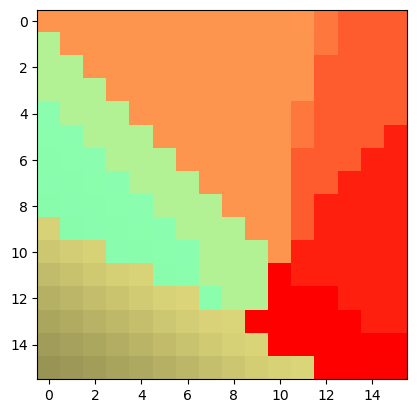

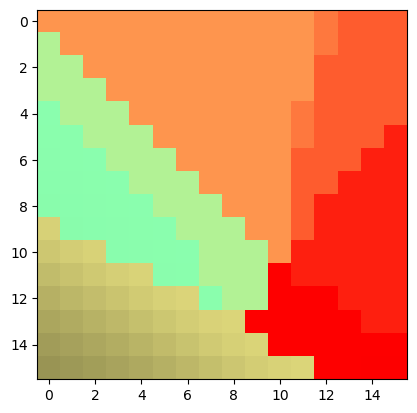

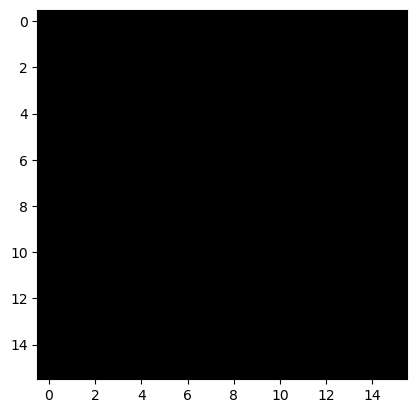

In [2]:

vertices = torch.tensor([[ 2.0462048054,  6.0099563599, -2.7709932327],
        [ 9.2570934296, -3.4037013054, -0.6154882908],
        [-0.3192037344, -0.4060620070, -4.8382291794],
        [ 2.3484408855, -0.4595559835,  5.1750946045],
        [ 2.0315635204, -8.9080104828,  1.1725664139],
        [-5.5116777420, -4.8009209633, -4.7378311157],
        [-9.1555585861, -1.2241894007, -1.7154008150],
        [ 2.5718522072, -2.6496136189,  0.6982851028],
        [-0.3329432011, -1.1659097672, -2.4887781143],
        [ 1.0286951065, -5.4186248779, -1.0571700335]], device='cuda:0')
viewmat = torch.tensor([[-6.2930476665e-01, -5.1553761959e-01,  5.8154672384e-01,
          6.3674771786e-01],
        [ 8.2019373775e-02, -7.8817689419e-01, -6.0995894670e-01,
         -2.4096879959e+00],
        [ 7.7281844616e-01, -3.3615204692e-01,  5.3828763962e-01,
          1.2050601244e+00],
        [ 1.4261853920e-09, -2.2020444135e-08,  1.1744639039e-08,
          1.0000000000e+00]], device='cuda:0')
tile_size = 4
# vertices = torch.tensor([[ 82.0273742676, -18.4693813324, -24.9799900055],
#         [ 16.4444446564, -85.1786270142,  15.7476787567],
#         [-60.0876617432, -35.8836898804,  35.0280990601],
#         [ 15.8716678619,  43.5945396423, -47.4486351013],
#         [ 34.9284782410, -17.3868656158,  68.8305740356],
#         [  4.3706297874,  49.3245124817, -10.7796373367],
#         [ 16.6389236450, -73.1919784546,  -6.8073091507],
#         [  3.1552910805,  83.7309112549,  30.8407058716],
#         [-71.2365112305, -19.4960365295, -29.1383209229]], device='cuda:0')
# viewmat = torch.tensor([[ 8.4252923727e-01,  5.1259768009e-01,  1.6549350321e-01,
#          -3.1906810760e+01],
#         [ 4.8346698284e-01, -5.8417510986e-01, -6.5191972256e-01,
#           1.7828264236e+01],
#         [-2.3749534786e-01,  6.2927192450e-01, -7.4000871181e-01,
#           7.0171638489e+01],
#         [-3.7626676774e-10, -3.5134320453e-10, -1.6197504449e-10,
#           1.0000000000e+00]], device='cuda:0')

# vertices = torch.tensor([[ 8.2027378082, -1.8469381332, -2.4979991913],
#         [ 1.6444444656, -8.5178623199,  1.5747678280],
#         [-6.0087661743, -3.5883688927,  3.5028100014],
#         [ 1.5871667862,  4.3594541550, -4.7448635101],
#         [ 3.4928476810, -1.7386865616,  6.8830575943],
#         [ 0.4370629787,  4.9324512482, -1.0779637098],
#         [ 1.6638922691, -7.3191976547, -0.6807309389],
#         [ 0.3155291080,  8.3730907440,  3.0840706825],
#         [-7.1236515045, -1.9496035576, -2.9138321877]], device='cuda:0')
# viewmat = torch.tensor([[ 5.7009392977e-01, -8.5568174768e-09,  8.2157957554e-01,
#          -5.5242192745e-01],
#         [-7.9130059481e-01,  2.6898160577e-01,  5.4908317327e-01,
#           3.9739084244e-01],
#         [ 2.2098951042e-01,  9.6314531565e-01, -1.5334483981e-01,
#           1.9988418579e+01],
#         [ 3.7314404899e-09,  3.0741256207e-09,  3.2300491171e-09,
#           9.9999994040e-01]], device='cuda:0')

vertices = torch.tensor([[ 20.4620475769,  60.0995674133, -27.7099304199],
        [ 92.5709381104, -34.0370101929,  -6.1548829079],
        [ -3.1920373440,  -4.0606203079, -48.3822937012],
        [ 23.4844093323,  -4.5955600739,  51.7509460449],
        [ 20.3156356812, -89.0801086426,  11.7256641388],
        [-55.1167793274, -48.0092124939, -47.3783149719],
        [-91.5555801392, -12.2418937683, -17.1540088654],
        [ 25.7185211182, -26.4961357117,   6.9828510284],
        [ -3.3294320107, -11.6590976715, -24.8877830505],
        [ 10.2869510651, -54.1862487793, -10.5717000961]], device='cuda:0')
viewmat = torch.tensor([[-7.0551438257e-03, -9.9558836222e-01, -9.3562632799e-02,
         -1.3959717751e+01],
        [-2.9261847958e-02, -9.3319177628e-02,  9.9520611763e-01,
          2.3583030701e+01],
        [-9.9954694510e-01,  9.7589502111e-03, -2.8474058956e-02,
         -3.9227991104e+00],
        [ 3.3181120074e-09,  4.8233399497e-09, -1.7642058925e-09,
          9.9999994040e-01]], device='cuda:0')
vertices = torch.tensor([[-48.7459831238,  49.0388412476,  11.6336460114],
        [-93.3950576782,   0.9913325310,  15.1278495789],
        [ 32.2530975342, -33.7204437256,  53.1733512878],
        [-70.8967895508, -31.2722797394, -34.3268623352],
        [ 33.2293739319,  78.7968292236,   9.0532188416],
        [  4.0731072426, -75.6198730469, -22.6994819641],
        [-73.9028701782,   1.1026263237,  -4.9048004150],
        [ 17.2808170319, -16.4057674408,  45.0614089966],
        [ 67.0716400146, -53.3739433289,  -5.3932371140],
        [-31.4031429291, -20.7615547180,  55.5021171570],
        [ 32.5810203552,  51.8176193237, -39.5931129456],
        [-64.8469543457, -41.1241722107, -35.2347373962],
        [-47.8792724609,  69.5892562866,   6.0590744019]], device='cuda:0')
viewmat = torch.tensor([[-2.1824234724e-01, -7.1014082432e-01,  6.6938054562e-01,
         -1.2062539101e+01],
        [-8.9712494612e-01, -1.2397897989e-01, -4.2402368784e-01,
         -6.8243156433e+01],
        [ 3.8410559297e-01, -6.9305789471e-01, -6.1002749205e-01,
          2.6158626556e+01],
        [ 8.9166862782e-10,  2.1059652633e-10,  2.7297708538e-10,
          1.0000000000e+00]], device='cuda:0')

def augment(v):
    return torch.cat([v, torch.ones_like(v[:, :1])], dim=-1)
indices = compute_delaunay(vertices)
colors = generate_color_palette(len(indices))
# colors[:13, 3] = 0
# colors[14:, 3] = 0
# print(colors[13])
# colors[-1, 3] = 0
# colors[-2, 3] = 0
# colors[5, 3] = 1

# colors2 = generate_color_palette(2)
# colors[:, 3] = 0
# colors[4] = colors2[0]
# colors[11:12] = colors2[1]
# print(indices[4], indices[11])

# print((viewmat @ augment(vertices[indices][5]).T)[:3].T)
# print(topo_utils.calculate_circumcenters(vertices[indices].double().cpu().numpy()))
# Run test
results = test_tetrahedra_rendering(
    vertices.cuda(), indices, colors, viewmat,
#     height=32, width=32, tile_size=4, fov=150)
    height=16, width=16, tile_size=4)
    # height=8, width=8)
circumcenters = augment(results['circumcenter'])
# print(results['circumcenter'])
print(results['vs_tetra'][13])
print(np.array(sorted(results['vs_tetra'][:, 2].detach().cpu().numpy().tolist())))
# # print(torch.linalg.norm(vertices - results['circumcenter'][5:6], dim=-1))

# print(f"Vertex Torch Grad: {results['torch_vertex_grad']}")
# print(f"Vertex Jax Grad: {results['jax_vertex_grad']}")
# print(f"RGBS Torch Grad: {results['torch_rgbs_grad']}")
# print(f"RGBS Jax Grad: {results['jax_rgbs_grad']}")
print(f"Max value torch: {results['torch_image'].max()}")
print(f"Max value jax: {results['jax_image'].max()}")
print(f"Mean Error: {results['mean_error']}")
print(f"Max Error: {results['max_error']}")
plt.imshow(results['torch_image'])
plt.show()
plt.imshow(results['jax_image'][..., :3])
plt.show()
plt.imshow(np.abs(results['jax_image'][..., :3] - results['torch_image']))
plt.show()

In [3]:
print(results['rect_tile_space'])

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [2, 0, 4, 3],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 4, 2],
        [0, 0, 4, 4],
        [0, 0, 1, 2],
        [0, 0, 3, 4],
        [0, 0, 4, 2],
        [0, 0, 4, 4],
        [0, 0, 0, 0],
        [0, 0, 4, 2],
        [0, 0, 4, 3],
        [0, 0, 4, 3],
        [0, 0, 4, 3],
        [0, 0, 0, 0],
        [0, 0, 4, 4],
        [0, 2, 4, 4]], device='cuda:0', dtype=torch.int32)


In [4]:
# from torch import tensor
# vertices, viewmat = tensor([[-2.7287, -1.4765,  1.1152],
#         [-0.8255, -9.5783, -1.0635],
#         [-0.6276, -0.1680,  8.0951],
#         [ 3.9301, -0.4400,  5.2449]], device='cuda:0'), tensor([[-4.4763e-01,  1.9049e-01,  8.7370e-01, -1.9145e+00],
#         [-8.8991e-01, -1.9068e-01, -4.1436e-01, -2.2477e+00],
#         [ 8.7669e-02, -9.6299e-01,  2.5487e-01, -1.4669e+00],
#         [ 1.5778e-10, -1.2270e-09,  2.3602e-09,  1.0000e+00]], device='cuda:0')
# drtest = DelaunayRenderTest()
# drtest.setUp()
# res = drtest.run_test(vertices, viewmat, 4)
# tile_size = 4
# N = 0
# for i in range(N):
#     # Generate point cloud and compute Delaunay tetrahedralization
#     points = generate_point_cloud(20, 100)
    
#     # Choose random center point
#     center_idx = torch.randint(0, len(points), (1,)).item()
#     center_point = points[center_idx]
    
#     # Create view matrix with random rotation looking out from center
#     viewmat = torch.eye(4).cuda()
#     viewmat[:3, :3] = drtest._random_rotation_matrix()
#     viewmat[:3, 3] = center_point
#     viewmat = torch.linalg.inv(viewmat)
#     try:
#         drtest.run_test(points, viewmat, tile_size)
#     except:
#         error_message = ""
#         error_message += f"\nvertices = torch.{points}"
#         error_message += f"\nviewmat = torch.{viewmat}"
#         print(error_message)
#         indices = compute_delaunay(points)
#         colors = generate_color_palette(len(indices))
#         results = test_tetrahedra_rendering(
#             points.cuda(), indices, colors, viewmat,
#         #     height=32, width=32, tile_size=4, fov=150)
#             height=16, width=16, tile_size=4)
#             # height=8, width=8)
#         circumcenters = augment(results['circumcenter'])
#         print(f"Max value torch: {results['torch_image'].max()}")
#         print(f"Max value jax: {results['jax_image'].max()}")
#         print(f"Mean Error: {results['mean_error']}")
#         print(f"Max Error: {results['max_error']}")
#         plt.imshow(results['torch_image'])
#         plt.show()
#         plt.imshow(results['jax_image'][..., :3])
#         plt.show()
#         plt.imshow(np.abs(results['jax_image'][..., :3] - results['torch_image']))
#         plt.show()

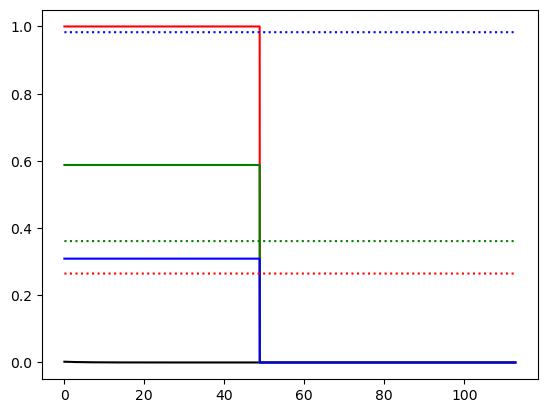

In [5]:

# print((viewmat @ circumcenters.T)[:3].T)
# print(colors, indices)
i, j = 5, 5
k = 3
qcolors = results['extras']['avg_colors'][i, j, 0]
weights = results['extras']['weights'][i, j, 0]
tdist = results['extras']['tdist'][i, j]
N = min(tdist[tdist < 10000].shape[0], tdist.shape[0]-1)
plt.plot(tdist[:N], weights[:N], c='black')
plt.plot(tdist[:N], qcolors[:N, 0], c='red')
plt.plot(tdist[:N], qcolors[:N, 1], c='green')
plt.plot(tdist[:N], qcolors[:N, 2], c='blue')
plt.plot(tdist[:N], float(colors[k][0].cpu())*np.ones_like(tdist[:N]), c='red', linestyle=':')
plt.plot(tdist[:N], float(colors[k][1].cpu())*np.ones_like(tdist[:N]), c='green', linestyle=':')
plt.plot(tdist[:N], float(colors[k][2].cpu())*np.ones_like(tdist[:N]), c='blue', linestyle=':')
plt.show()


In [6]:

def create_tetrahedron_mesh(points, tetra_idx):
    """
    Create mesh data for a tetrahedron from 4 points
    """
    # Get the 4 points that make up the tetrahedron
    tetra_points = points[tetra_idx]
    
    # Define the faces of the tetrahedron
    faces = [
        [0, 1, 2],  # Face 1
        [0, 1, 3],  # Face 2
        [0, 2, 3],  # Face 3
        [1, 2, 3]   # Face 4
    ]
    
    # Create lists for the mesh
    vertices = []
    i_faces = []
    for face in faces:
        # Add current face indices offset by current number of vertices
        i_faces.append([len(vertices) + i for i in range(3)])
        # Add vertices for this face
        for idx in face:
            vertices.append(tetra_points[idx])
    
    vertices = np.array(vertices)
    i_faces = np.array(i_faces)
    
    return vertices, i_faces

def create_3d_visualization(points, tetrahedra_indices, spheres=None):
    """
    Create an interactive 3D visualization of points, tetrahedra, and spheres with drop lines
    
    Parameters:
    points: numpy array of shape (n, 3) containing point coordinates
    tetrahedra_indices: list of 4-tuples containing point indices for each tetrahedron
    spheres: list of tuples, each containing (center_x, center_y, center_z, radius)
    """
    fig = go.Figure()
    
    # Add scatter points
    fig.add_trace(go.Scatter3d(
        x=points[:, 0],
        y=points[:, 1],
        z=points[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color='blue',
            opacity=0.8
        ),
        name='Points'
    ))
    
    # Add drop lines for points
    for i in range(len(points)):
        fig.add_trace(go.Scatter3d(
            x=[points[i, 0], points[i, 0]],
            y=[points[i, 1], points[i, 1]],
            z=[0, points[i, 2]],
            mode='lines',
            line=dict(color='lightblue', width=1),
            showlegend=False,
            hoverinfo='skip'
        ))
    
    # Add tetrahedra
    for tetra_idx, tetra in enumerate(tetrahedra_indices):
        # Get vertices for this tetrahedron
        tetra_points = points[tetra]
        
        # Add edges of the tetrahedron
        edges = [
            (0, 1), (0, 2), (0, 3),  # Edges from point 0
            (1, 2), (1, 3),          # Edges from point 1
            (2, 3)                    # Edge from point 2 to 3
        ]
        
        for start, end in edges:
            fig.add_trace(go.Scatter3d(
                x=[tetra_points[start, 0], tetra_points[end, 0]],
                y=[tetra_points[start, 1], tetra_points[end, 1]],
                z=[tetra_points[start, 2], tetra_points[end, 2]],
                mode='lines',
                line=dict(color='green', width=2),
                showlegend=False if tetra_idx > 0 else True,
                name='Tetrahedra Edges'
            ))
        
        # Create mesh for faces
        vertices, i_faces = create_tetrahedron_mesh(points, tetra)
        
        # Add faces of the tetrahedron
        fig.add_trace(go.Mesh3d(
            x=vertices[:, 0],
            y=vertices[:, 1],
            z=vertices[:, 2],
            i=i_faces[:, 0],
            j=i_faces[:, 1],
            k=i_faces[:, 2],
            opacity=0.2,
            color='green',
            showlegend=False if tetra_idx > 0 else True,
            name='Tetrahedra Faces'
        ))
    
    # Add spheres and their drop lines if provided
    if spheres is not None:
        for sphere_idx, (cx, cy, cz, r) in enumerate(spheres):
            # Create sphere mesh
            u = np.linspace(0, 2*np.pi, 100)
            v = np.linspace(0, np.pi, 100)
            x = cx + r * np.outer(np.cos(u), np.sin(v))
            y = cy + r * np.outer(np.sin(u), np.sin(v))
            z = cz + r * np.outer(np.ones(np.size(u)), np.cos(v))
            
            fig.add_trace(go.Surface(
                x=x, y=y, z=z,
                opacity=0.3,
                showscale=False,
                name=f'Sphere {sphere_idx+1}'
            ))
            
            # Add drop line for sphere center
            fig.add_trace(go.Scatter3d(
                x=[cx, cx],
                y=[cy, cy],
                z=[0, cz],
                mode='lines',
                line=dict(color='red', width=2),
                name=f'Sphere {sphere_idx+1} Center Line',
            ))
            
            # Add sphere center point
            fig.add_trace(go.Scatter3d(
                x=[cx],
                y=[cy],
                z=[cz],
                mode='markers',
                marker=dict(
                    size=6,
                    color='red',
                    symbol='circle'
                ),
                name=f'Sphere {sphere_idx+1} Center'
            ))
    
    # Add a semi-transparent plane at z=0
    x_range = [points[:, 0].min() - 1, points[:, 0].max() + 1]
    y_range = [points[:, 1].min() - 1, points[:, 1].max() + 1]
    x_plane, y_plane = np.meshgrid(np.linspace(*x_range, 2), np.linspace(*y_range, 2))
    z_plane = np.zeros_like(x_plane)
    
    fig.add_trace(go.Surface(
        x=x_plane,
        y=y_plane,
        z=z_plane,
        opacity=0.2,
        showscale=False,
        name='z=0 plane'
    ))
    
    # Update layout for better visualization
    fig.update_layout(
        scene=dict(
            aspectmode='data',
            camera=dict(
                up=dict(x=0, y=0, z=1),
                center=dict(x=0, y=0, z=0),
                eye=dict(x=1.5, y=1.5, z=1.5)
            )
        ),
        width=800,
        height=800,
        showlegend=True
    )
    
    return fig
# Generate some random points
np.random.seed(42)
n_points = 100
points = np.random.randn(n_points, 3)
c_vertices = (viewmat @ augment(vertices).T)[:3].T
print(indices.shape)
# vindices = indices[(4, 11), :]
vindices = indices[5:6]

centers, radius = topo_utils.calculate_circumcenters(c_vertices[vindices].double().cpu().numpy())
print(centers)
# Define some example spheres
spheres = np.array([[center[0], center[1], center[2], r] for center, r in zip(centers, radius)])

# Create visualization
fig = create_3d_visualization(c_vertices.cpu().numpy(), vindices.cpu().numpy(), spheres)

# Show the plot
fig.show()

torch.Size([26, 4])
[[-27.90621553 -79.36000036   5.84453609]]
